<a href="https://colab.research.google.com/github/Faskill/GNN-book/blob/main/GNN_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/relationships_hashed.json'
!ls

--2023-03-25 16:12:44--  https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/relationships_hashed.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963530 (941K) [text/plain]
Saving to: ‘relationships_hashed.json’

relationships_hashe 100%[===================>] 940.95K  --.-KB/s    in 0.03s   

2023-03-25 16:12:44 (28.4 MB/s) - ‘relationships_hashed.json’ saved [963530/963530]

relationships_hashed.json  sample_data


In [137]:
import json
with open('relationships_hashed.json', 'rb') as file:
    json_data = json.load(file)

In [ ]:
print(len(list(json_data.keys())))
json_data[list(json_data.keys())[0]]

1855


['20e53a53a9875ce3c1beeac367c52699f69772ef']

In [ ]:
import timeit
#Creating adjacency list from json file
#This function has been modified from the book's function to improve efficiency
def create_adjacency_list(data_dict, suffix=''):
    node_list = set()
    for source_node in list(data_dict.keys()):
        node_list.add(source_node)
    for x in data_dict[source_node]:
        node_list.add(x)
        if x not in data_dict.keys():
            data_dict[x] = [source_node]
        else:
            if source_node not in data_dict[x]:
                data_dict[x].append(source_node)
    g= open("adjacency_list_{}.txt".format(suffix),"w+")
    for source_node in list(data_dict.keys()):
        dt = ' '.join(data_dict[source_node])
        g.write("{} {} \n".format(source_node, dt))
    g.close
    return node_list

In [ ]:
#Timing our improved function
%%timeit -r 4
create_adjacency_list(json_data)
None

9.14 ms ± 1.3 ms per loop (mean ± std. dev. of 4 runs, 100 loops each)


In [ ]:
#Source function from book
def create_adjacency_list2(data_dict, suffix=''):

    list_of_nodes = []
    for source_node in list(data_dict.keys()): #A
        if source_node not in list_of_nodes:
            list_of_nodes.append(source_node)
        for y in data_dict[source_node]: #B
            if y not in list_of_nodes: #B
                list_of_nodes.append(y) #B
            if y not in data_dict.keys(): #B
                data_dict[y]=[source_node] #B
            else: #B
                if source_node not in data_dict[y]: #B
                    data_dict[y].append(source_node) #B
                else: continue #B
    g= open("adjacency_list_{}.txt".format(suffix),"w+") #C
    for source_node in list(data_dict.keys()): #D
        dt = ' '.join(data_dict[source_node]) #E
        g.write("{} {} \n".format(source_node, dt)) #G
    g.close
    return list_of_nodes

In [ ]:
%%timeit -r 4
create_adjacency_list2(json_data)
None

339 ms ± 14.2 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


The modified version is 38x faster

In [ ]:
#Optimized function
def create_edge_list(data_dict, suffix=''):
    edge_list_file = open("edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = set()
    list_of_nodes = set()

    for source_node in list(data_dict.keys()):
        list_of_nodes.add(source_node)
        connections = data_dict[source_node]

        for destination_node in connections:
            list_of_nodes.add(destination_node)
            _tmp = len(list_of_edges)
            list_of_edges.add((source_node, destination_node))
            if len(list_of_edges) != _tmp:
                edge_list_file.write("{} {}".format(source_node, destination_node))
        edge_list_file.close
    return list_of_edges, list_of_nodes

In [ ]:
#Optimized function (slight variation)
def create_edge_list2(data_dict, suffix=''):
    edge_list_file = open("edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = set()
    list_of_nodes = set()

    for source_node in list(data_dict.keys()):
        list_of_nodes.add(source_node)
        connections = data_dict[source_node]

        for destination_node in connections:
            list_of_nodes.add(destination_node)
            if (source_node, destination_node) not in list_of_edges:
                edge_list_file.write("{} {} \n".format(source_node, destination_node))
                list_of_edges.add((source_node, destination_node))
    edge_list_file.close
    return list_of_edges, list_of_nodes

In [ ]:
#Function from the book
def create_edge_list3(data_dict, suffix=''):
    edge_list_file = open("edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = []
    list_of_nodes_all = []
    for source_node in list(data_dict.keys()):
        if source_node not in list_of_nodes_all:
            list_of_nodes_all.append(source_node)
            list_of_connects = data_dict[source_node]
        for destination_node in list_of_connects: #A
            if destination_node not in list_of_nodes_all:
                list_of_nodes_all.append(destination_node)
            if {source_node, destination_node} not in list_of_edges:
                edge_list_file.write("{} {} \n".format(source_node, destination_node)) #C
                list_of_edges.append({source_node, destination_node})
            else: continue
    edge_list_file.close
    return list_of_edges, list_of_nodes_all

In [ ]:
%%timeit -r 4 -n 1000
create_edge_list(json_data)
None

42.6 ms ± 307 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


In [ ]:
%%timeit -r 4 -n 1000
create_edge_list2(json_data)
None

41 ms ± 320 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


In [ ]:
%%timeit -r 4
create_edge_list3(json_data)
None

1.79 s ± 441 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


Our second optimized function speeds up calculation by 41x.

## Data Loading 

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
import networkx as nx
import pandas as pd
import numpy as np

with open('relationships_hashed.json', 'rb') as file:
    json_data = json.load(file)

In [ ]:
!wget 'https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/node_attributes_hashed.csv'

--2023-03-25 16:13:00--  https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/node_attributes_hashed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155173 (152K) [text/plain]
Saving to: ‘node_attributes_hashed.csv’

node_attributes_has 100%[===================>] 151.54K  --.-KB/s    in 0.02s   

2023-03-25 16:13:00 (8.64 MB/s) - ‘node_attributes_hashed.csv’ saved [155173/155173]



In [ ]:
node_attr = pd.read_csv('node_attributes_hashed.csv')
node_attr

,position_type,company_type,hashedid,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,engineer,tech,058b92d6c47c4f8e29b302b30a1fff4a21ba9d36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,executive_or_management,finance,e943ba6d3c0eb8589df32a873ab5772c8f77c68f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,marketing_sales,Unknown,07722a6692fb28485ddaf84979322fb5a78d0926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,marketing_sales,Unknown,eb319e0714095bc9f9517317e9040f125b8de8d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,misc,misc,acddbb2edb475d3a5fd127075dc146eb9ba94e0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,misc,misc,d2d878318aaa8825d9e0e43b162ae0b33a9a90ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,executive_or_management,nonprofit_ngo,3e0a9701ee6796753d601a8d9ba551fec1e9b8d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,education,education,dbfb54497fe275982736b278a69ac0d6554469d0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,misc,tech,ef0a4531dbc7fd4b16765ea67bbbac66c496f392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
node_attr = node_attr[["position_type","company_type","hashedid"]]
node_attr.head()

,position_type,company_type,hashedid
0,engineer,tech,058b92d6c47c4f8e29b302b30a1fff4a21ba9d36
1,executive_or_management,finance,e943ba6d3c0eb8589df32a873ab5772c8f77c68f
2,marketing_sales,Unknown,07722a6692fb28485ddaf84979322fb5a78d0926
3,marketing_sales,Unknown,eb319e0714095bc9f9517317e9040f125b8de8d4
4,misc,misc,acddbb2edb475d3a5fd127075dc146eb9ba94e0e


In [ ]:
node_attr.loc[(node_attr.position_type.isna()) | (node_attr.company_type.isna())]

,position_type,company_type,hashedid


In [ ]:
node_attr.set_index('hashedid', inplace=True)

In [139]:
node_list = create_adjacency_list(json_data)
print(len(node_attr), len(node_list))
node_attr = node_attr[node_attr.index.isin(node_list)]
print(len(node_attr))
node_attributes = node_attr.to_dict(orient='index')

1931 1853
1853


In [ ]:
nodes_with_no_attributes = node_list - set(node_attr.index)
nodes_with_no_attributes

{'549eddd71c0015ad4e1e8d7ee5084316bf8311c2',
 'c0470c980335579cfbe767451a1979a52b9e9c66'}

In [ ]:
#Updating function to ignore nodes with no attributes
def create_adjacency_list(data_dict, suffix=''):
    node_list = set()
    for source_node in list(data_dict.keys()):
        if source_node not in nodes_with_no_attributes:
            node_list.add(source_node)

    for x in data_dict[source_node]:
        if x not in nodes_with_no_attributes:
            node_list.add(x)
            if x not in data_dict.keys():
                data_dict[x] = [source_node]
            else:
                if source_node not in data_dict[x]:
                    data_dict[x].append(source_node)
        else:
            data_dict.pop(source_node)
    g= open("adjacency_list_{}.txt".format(suffix),"w+")
    for source_node in list(data_dict.keys()):
        if source_node not in nodes_with_no_attributes:
            dt = ' '.join(data_dict[source_node])
            g.write("{} {} \n".format(source_node, dt))
    g.close
    return node_list

In [ ]:
node_list = create_adjacency_list(json_data)
len(node_list)

1931

In [ ]:
#Setting node attributes
social_graph = nx.read_adjlist('adjacency_list_.txt')
nx.set_node_attributes(social_graph, node_attributes)
print(social_graph.number_of_nodes(), social_graph.number_of_edges())

1931 12239


In [ ]:
len([c for c in nx.connected_components(social_graph)])

217

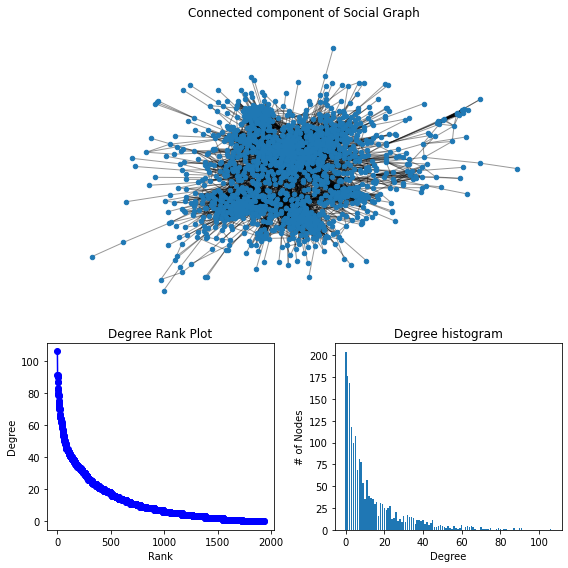

In [ ]:
import matplotlib.pyplot as plt

## Modified from NetworkX documentation.
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
# ‘Gcc’ stands for ‘graph connected component’
Gcc = social_graph.subgraph(sorted(nx.connected_components(social_graph), key=len,
reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected component of Social Graph")
ax0.set_axis_off()
degree_sequence = sorted([d for n, d in social_graph.degree()], reverse=True)
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
fig.tight_layout()
plt.show()

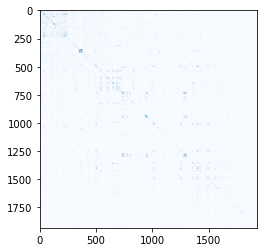

In [ ]:
#Adjacency matrix of our graph
plt.imshow(nx.to_numpy_array(social_graph), aspect='equal',cmap='Blues')
plt.show()

## Importing our graph object into Pytorch Geometric (PyG)

### 1. Using import from NetworkX

In [ ]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.2/616.2 KB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.0-py3-none-any.whl size=909897 sha256=a1e5a8c3906fe164621d531f5fb69f86dc3f2456d38ceaa97f3bbe1b67dab89b
  Stored in directory: /root/.cache/pip/wheels/cd/7d/6b/17150450b80b4a3656a84330e22709ccd8dc0f8f4773ba4133
Successfully built torch_geometric


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.data import InMemoryDataset
from torch_geometric import utils

In [ ]:
data = utils.from_networkx(social_graph)
data

Data(edge_index=[2, 24478], position_type=[1931], company_type=[1931], num_nodes=1931)

### 2. Importing from raw files 

In [ ]:
#Modifying the create_edge_list function to exclude nodes without attributes
def create_edge_list2(data_dict, suffix=''):
    n=0
    list_of_edges = set()
    list_of_nodes = set()
    g= open("edge_list_{}.txt".format(suffix), "w+")
    for source_node in list(data_dict.keys()):
        if source_node not in nodes_with_no_attributes:
            list_of_nodes.add(source_node)
            connections = data_dict[source_node]

            for destination_node in connections:
                if destination_node not in nodes_with_no_attributes:
                    list_of_nodes.add(destination_node)
                    if (source_node, destination_node) not in list_of_edges:
                        n+=1
                        g.write("{} {} \n".format(source_node, destination_node))
                        list_of_edges.add((source_node, destination_node))
    g.close
    return list_of_edges, list_of_nodes
edges, nodes = create_edge_list2(json_data)
len(nodes)

1931

In [ ]:
social_graph = nx.read_edgelist('edge_list_.txt')

list_of_nodes = list(set(list(social_graph)))
indices_of_nodes = [list_of_nodes.index(x) for x in list_of_nodes]
node_to_index = dict(zip(list_of_nodes, indices_of_nodes))
index_to_node = dict(zip(indices_of_nodes, list_of_nodes))

list_edges = nx.convert.to_edgelist(social_graph)
list_edges = list(list_edges)

named_edge_list_0 = [x[0] for x in list_edges]
named_edge_list_1 = [x[1] for x in list_edges]

indexed_edge_list_0 = [node_to_index[x] for x in named_edge_list_0]
indexed_edge_list_1 = [node_to_index[x] for x in named_edge_list_1]

x = torch.FloatTensor([[1] for x in range(len(list_of_nodes))])
y = torch.FloatTensor([1]*974 + [0]*973)
y = y.long()

edge_index = torch.tensor([indexed_edge_list_0, indexed_edge_list_1])

train_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8)
train_mask[:int(0.8 * len(list_of_nodes))] = 1 #train only on the 80% nodes
test_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8) #test on 20 % nodes
test_mask[- int(0.2 * len(list_of_nodes)):] = 1

train_mask = train_mask.bool()
test_mask = test_mask.bool()

data = Data(x=x, y=y, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask)

## 3. Creating Pyg Dataset from custom class

In [136]:
class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None): #A
        super(MyOwnDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

        @property
        def raw_file_names(self): #B
            return []

        @property
        def processed_file_names(self): #C
            return ['../test.dataset']

        def download(self): #D
            # Download to `self.raw_dir`.
            pass

        def process(self): #E
            # Read data into `Data` list.
            data_list = []
            eg = nx.read_edgelist('edge_list_.txt')

            list_of_nodes = list(set(list(eg)))
            indices_of_nodes = [list_of_nodes.index(x) for x in list_of_nodes]
            node_to_index = dict(zip(list_of_nodes, indices_of_nodes))
            index_to_node = dict(zip(indices_of_nodes, list_of_nodes))
            list_edges = nx.convert.to_edgelist(eg)
            list_edges = list(list_edges)

            named_edge_list_0 = [x[0] for x in list_edges]
            named_edge_list_1 = [x[1] for x in list_edges]
            indexed_edge_list_0 = [node_to_index[x] for x in named_edge_list_0]
            indexed_edge_list_1 = [node_to_index[x] for x in named_edge_list_1]

            x = torch.FloatTensor([[1] for x in range(len(list_of_nodes))])
            y = torch.FloatTensor([1]*974 + [0]*973)
            y = y.long()

            edge_index = torch.tensor([indexed_edge_list_0, indexed_edge_list_1])

            train_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8)
            train_mask[:int(0.8 * len(list_of_nodes))] = 1 #train only on the 80% nodes
            test_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8) #test on 20 % nodes
            test_mask[- int(0.2 * len(list_of_nodes)):] = 1
            train_mask = train_mask.bool()
            test_mask = test_mask.bool()

            data_example = Data(x=x, y=y, edge_index=edge_index, train_mask=train_mask,
            test_mask=test_mask)
            data_list.append(data_example)
            data, slices = self.collate(data_list)

            torch.save((data, slices), self.processed_paths[0])